In [1]:
# Ячейка 1: Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append('../src')
from data_loader import DataLoader, load_raw

# Настройка отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

In [2]:
# Ячейка 2: Загрузка и подготовка данных
print("ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ...")

# Способ 1: Используя ваш быстрый метод
raw_df = load_raw('../data/raw/marketing_AB.csv')
print("Сырые данные загружены:")
print(f"Колонки: {list(raw_df.columns)}")
print(f"Размер: {raw_df.shape}")

# Способ 2: Используя наш класс (с валидацией)
loader = DataLoader('../data/raw/marketing_AB.csv')
df = loader.load_and_prepare_data()
basic_info = loader.get_basic_info()

print("\nИНФОРМАЦИЯ О ПОДГОТОВЛЕННЫХ ДАННЫХ:")
print(f"Размер данных: {basic_info['shape']}")
print(f"Использование памяти: {basic_info['memory_usage_mb']} MB")
print(f"Колонки после обработки: {basic_info['columns']}")

ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ...
Сырые данные загружены:
Колонки: ['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour']
Размер: (588101, 7)


INFO:data_loader:Данные успешно загружены. Размер: (588101, 7)
INFO:data_loader:Данные предобработаны
INFO:data_loader:Новые названия колонок: ['unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']
INFO:data_loader:Валидация данных пройдена



ИНФОРМАЦИЯ О ПОДГОТОВЛЕННЫХ ДАННЫХ:
Размер данных: (588101, 7)
Использование памяти: 78.6 MB
Колонки после обработки: ['unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']


In [3]:
# Ячейка 3: Детальный анализ данных
print("\n ДЕТАЛЬНЫЙ АНАЛИЗ ДАННЫХ:")
print("Первые 5 строк после обработки:")
df.head()



 ДЕТАЛЬНЫЙ АНАЛИЗ ДАННЫХ:
Первые 5 строк после обработки:


,unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
print("\nОписательная статистика числовых колонок:")
print(df[['total_ads', 'most_ads_hour']].describe())

print("\nКатегориальные переменные:")
print("Дни недели:")
print(df['most_ads_day'].value_counts().sort_index())

print(f"\nРезультат валидации: user_id уникален - {df['user_id'].is_unique}")


Описательная статистика числовых колонок:
           total_ads  most_ads_hour
count  588101.000000  588101.000000
mean       24.820876      14.469061
std        43.715181       4.834634
min         1.000000       0.000000
25%         4.000000      11.000000
50%        13.000000      14.000000
75%        27.000000      18.000000
max      2065.000000      23.000000

Категориальные переменные:
Дни недели:
most_ads_day
Friday       92608
Monday       87073
Saturday     81660
Sunday       85391
Thursday     82982
Tuesday      77479
Wednesday    80908
Name: count, dtype: int64

Результат валидации: user_id уникален - True


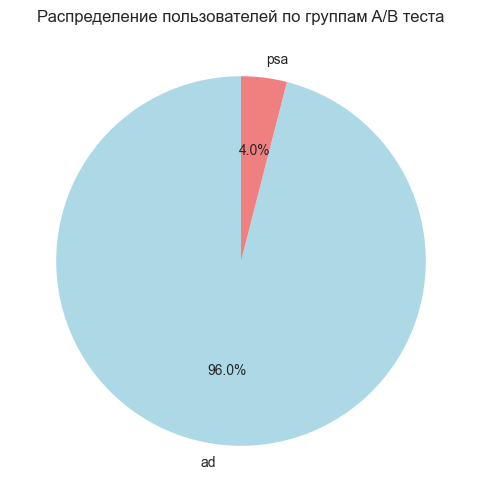

Абсолютные значения:
  ad: 564577 пользователей
  psa: 23524 пользователей


In [5]:
# Ячейка 4.1: Распределение пользователей по группам
plt.figure(figsize=(10, 6))
group_counts = df['test_group'].value_counts()
plt.pie(group_counts.values, labels=group_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Распределение пользователей по группам A/B теста')
plt.show()

print(f"Абсолютные значения:")
for group, count in group_counts.items():
    print(f"  {group}: {count} пользователей")

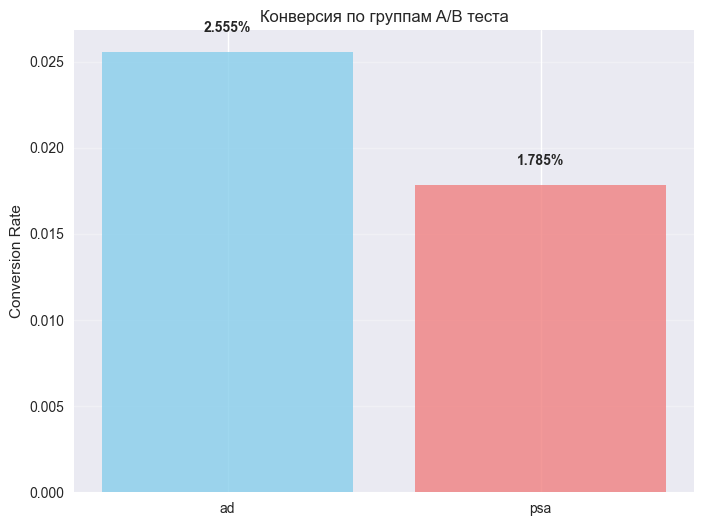


Конверсия по группам:
  ad: 2.555% (14423/564577 пользователей)
  psa: 1.785% (420/23524 пользователей)


In [6]:
# Ячейка 4.2: Конверсия по группам
plt.figure(figsize=(8, 6))
conversion_by_group = df.groupby('test_group')['converted'].mean()
bars = plt.bar(conversion_by_group.index, conversion_by_group.values, 
               color=['skyblue', 'lightcoral'], alpha=0.8)

plt.title('Конверсия по группам A/B теста')
plt.ylabel('Conversion Rate')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, conversion_by_group.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{value:.3%}', ha='center', va='bottom', fontweight='bold')

plt.show()

print("\nКонверсия по группам:")
for group, rate in conversion_by_group.items():
    converted_count = df[df['test_group'] == group]['converted'].sum()
    total_count = len(df[df['test_group'] == group])
    print(f"  {group}: {rate:.3%} ({converted_count}/{total_count} пользователей)")

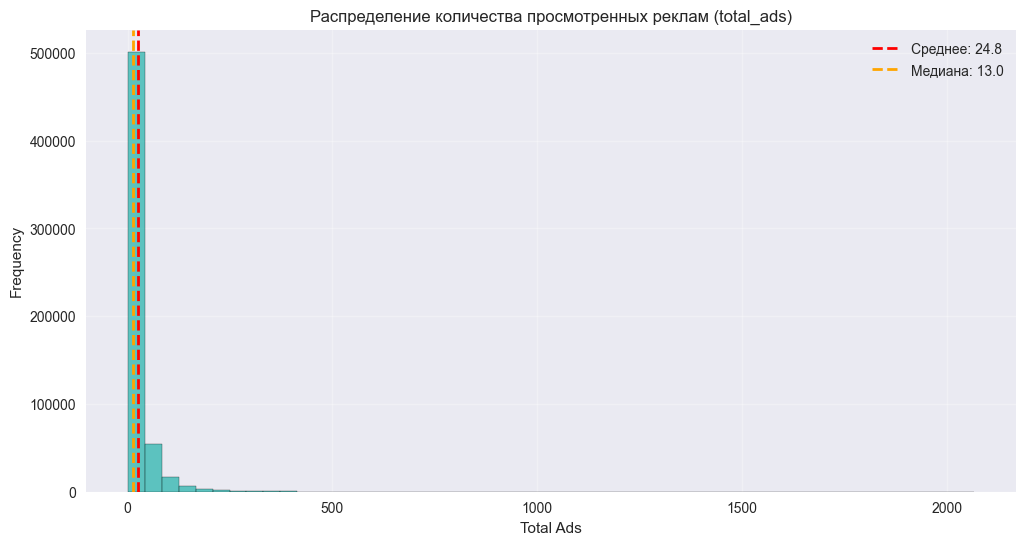

Статистика total_ads:
  Среднее: 24.8
  Медиана: 13.0
  Стандартное отклонение: 43.7
  Минимум: 1
  Максимум: 2065


In [7]:
# Ячейка 4.3: Распределение total_ads
plt.figure(figsize=(12, 6))

# Гистограмма
plt.hist(df['total_ads'], bins=50, edgecolor='black', alpha=0.7, color='lightseagreen')
plt.title('Распределение количества просмотренных реклам (total_ads)')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Вертикальные линии для статистик
mean_ads = df['total_ads'].mean()
median_ads = df['total_ads'].median()
plt.axvline(mean_ads, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_ads:.1f}')
plt.axvline(median_ads, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_ads:.1f}')

plt.legend()
plt.show()

print(f"Статистика total_ads:")
print(f"  Среднее: {mean_ads:.1f}")
print(f"  Медиана: {median_ads:.1f}")
print(f"  Стандартное отклонение: {df['total_ads'].std():.1f}")
print(f"  Минимум: {df['total_ads'].min()}")
print(f"  Максимум: {df['total_ads'].max()}")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


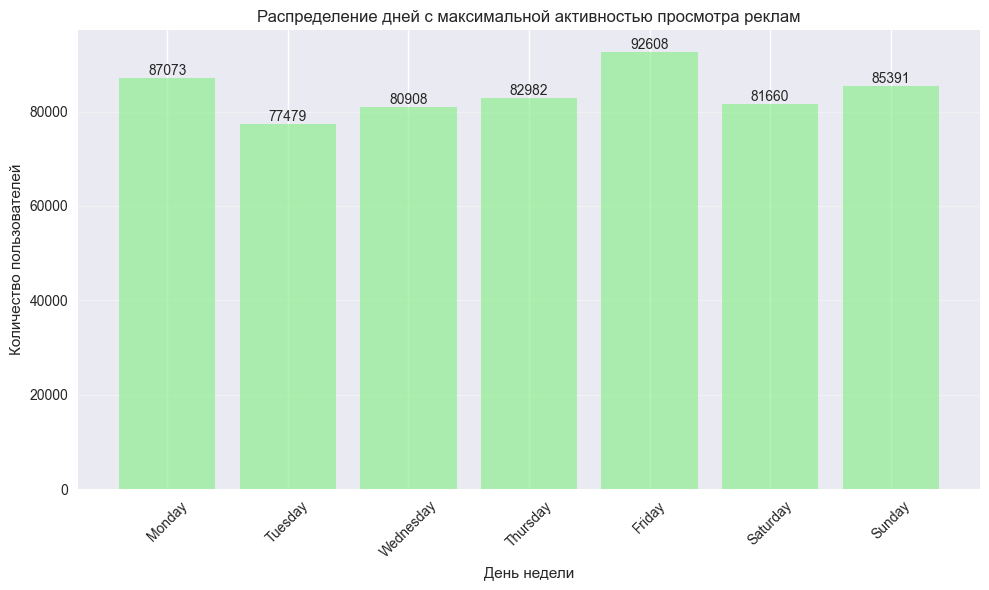

Распределение по дням недели:
  Monday: 87073 пользователей (14.8%)
  Tuesday: 77479 пользователей (13.2%)
  Wednesday: 80908 пользователей (13.8%)
  Thursday: 82982 пользователей (14.1%)
  Friday: 92608 пользователей (15.7%)
  Saturday: 81660 пользователей (13.9%)
  Sunday: 85391 пользователей (14.5%)


In [8]:
# Ячейка 4.4: Распределение по дням недели
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['most_ads_day'].value_counts().reindex(day_order)

bars = plt.bar(day_counts.index, day_counts.values, color='lightgreen', alpha=0.7)
plt.title('Распределение дней с максимальной активностью просмотра реклам')
plt.xlabel('День недели')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, day_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Распределение по дням недели:")
for day, count in day_counts.items():
    percentage = count / len(df) * 100
    print(f"  {day}: {count} пользователей ({percentage:.1f}%)")

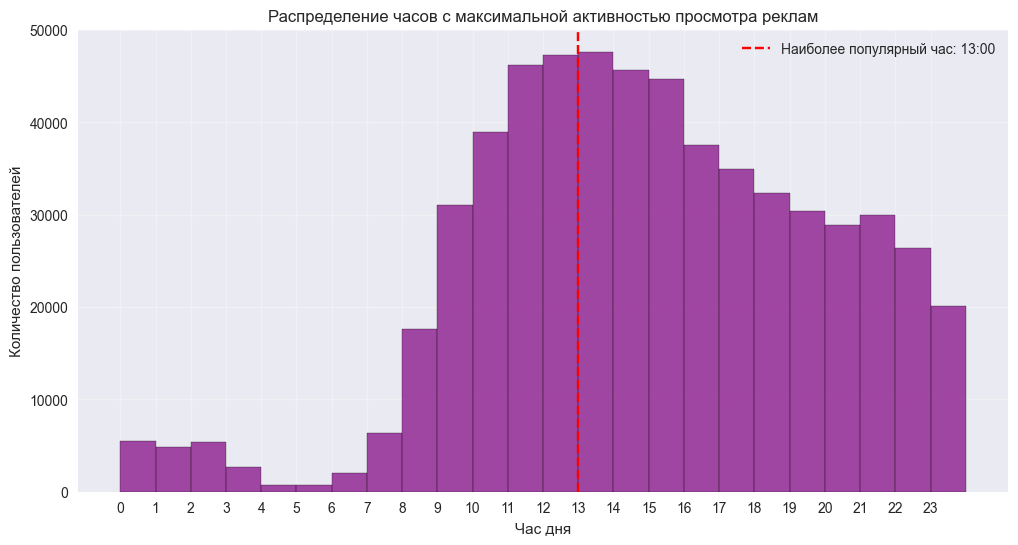

Наиболее популярный час для просмотра реклам: 13:00
Количество пользователей в этот час: 47655


In [9]:
# Ячейка 4.5: Распределение по часам дня
plt.figure(figsize=(12, 6))

# Гистограмма по часам
plt.hist(df['most_ads_hour'], bins=24, edgecolor='black', alpha=0.7, color='purple', range=(0, 24))
plt.title('Распределение часов с максимальной активностью просмотра реклам')
plt.xlabel('Час дня')
plt.ylabel('Количество пользователей')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)

# Вычисляем наиболее популярные часы
hour_counts = df['most_ads_hour'].value_counts().sort_index()
most_popular_hour = hour_counts.idxmax()

plt.axvline(most_popular_hour, color='red', linestyle='--', 
            label=f'Наиболее популярный час: {most_popular_hour}:00')

plt.legend()
plt.show()

print(f"Наиболее популярный час для просмотра реклам: {most_popular_hour}:00")
print(f"Количество пользователей в этот час: {hour_counts[most_popular_hour]}")

In [10]:
# Ячейка 5: Анализ качества данных
print("\nАНАЛИЗ КАЧЕСТВА ДАННЫХ:")
print(f"Уникальных user_id: {df['user_id'].nunique()} из {len(df)}")
print(f"Дубликатов: {len(df) - df['user_id'].nunique()}")

# Проверка пропущенных значений
missing = df.isnull().sum()
print(f"Пропущенных значений: {missing.sum()}")



АНАЛИЗ КАЧЕСТВА ДАННЫХ:
Уникальных user_id: 588101 из 588101
Дубликатов: 0
Пропущенных значений: 0


In [11]:
# Ячейка 6: Сохранение обработанных данных
processed_path = '../data/processed/cleaned_marketing_ab.csv'
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)
print(f"Обработанные данные сохранены: {processed_path}")
print(f"Размер файла: {os.path.getsize(processed_path) / 1024 / 1024:.2f} MB")

Обработанные данные сохранены: ../data/processed/cleaned_marketing_ab.csv
Размер файла: 21.52 MB
